# Task 3

_Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data._
### Dataset:
This dataset is a Bank Marketing dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Columns Description:
* age : Integer Age
* job : Occupation
* marital : Marital Status
* education : Education Level
* default : has credit in default?
* balance : average yearly balance in euros
* housing : has housing loan?
* loan : has personal loan?
* contact : contact communication type
* day_of_week : last contact day of the week
* duration : last contact duration, in seconds (numeric)
* campaign : number of contacts performed during this campaign and for this client
* pdays : number of days that passed by after the client was last contacted from a previous campaign(numeric, -1 means client was not previously contacted)
* previous : number of contacts performed before this campaign and for this client
* poutcome : outcome of the previous marketing campaign
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)
* y : has the client subscribed a term deposit? (outcome)

In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
#Loading data
bank = pd.read_csv("D:\\MBA-MMS\\Internships\\Prodigy InfoTech\\Task 3\\bank-additional-full.csv",sep=';')

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


## Data Pre-Processing

In [6]:
#Satistical Analysis
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
bank.shape

(41188, 21)

In [15]:
#Checking Missing values
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

__There are no missing values present in the dataset.__

In [16]:
#Checking for duplicates
bank.duplicated().sum()

np.int64(12)

In [17]:
#Investigating these 12 duplicates
bank[bank.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


**These values relate to different campaigns hence not duplicates**

## Exploratory Data Analysis (EDA)

### Age Distribution

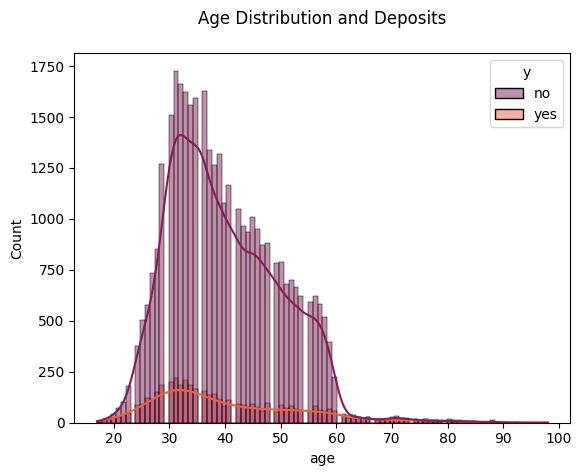

In [21]:
sns.histplot(x="age", data=bank, kde=True, hue= "y", palette='rocket')
plt.title("Age Distribution and Deposits\n")
plt.show()

`Maximum clients are in the age group of 30 - 40 and majority clients subscribing to Term Deposit also fall between these age groups.`

### Distribution of Occupation

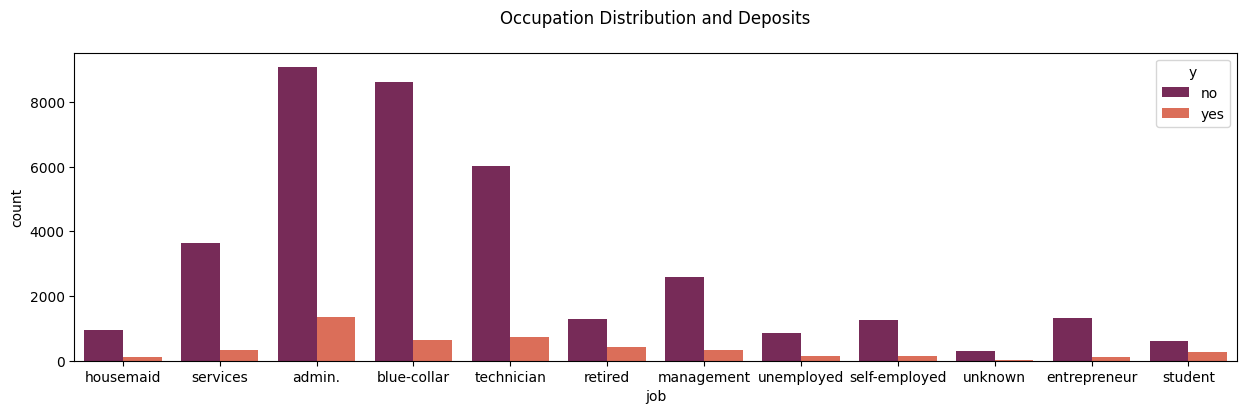

In [20]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank, hue ="y",palette='rocket')
plt.title("Occupation Distribution and Deposits\n")
plt.show()

`Majority of clients have occupation "Admin", "blue-collar" or "Technician" and maximum clients subscribing to Term Deposit also are from these occupation.`

### Distribution of Marital Status

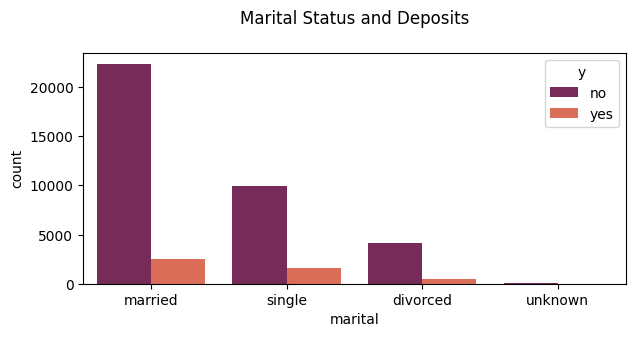

In [22]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank, hue ="y", palette="rocket")
plt.title("Marital Status and Deposits\n")
plt.show()

`Clients are mostly married`

### Distribution of Educational Status

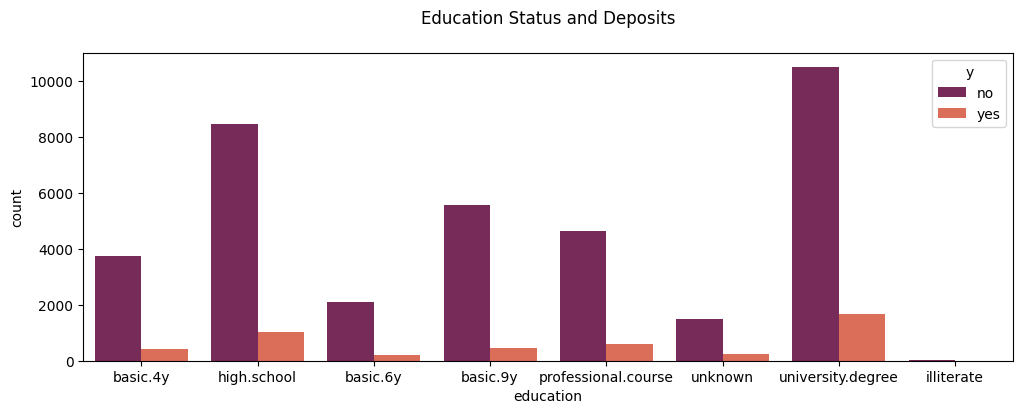

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="y", palette="rocket")
plt.title("Education Status and Deposits\n")
plt.show()

`Most of the clients have University degree and have studied high or professional course.`

### Credit Default(If any)

In [24]:
bank.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

`Only 3 clients have a Credit default`

### Distribution of Housing Loan

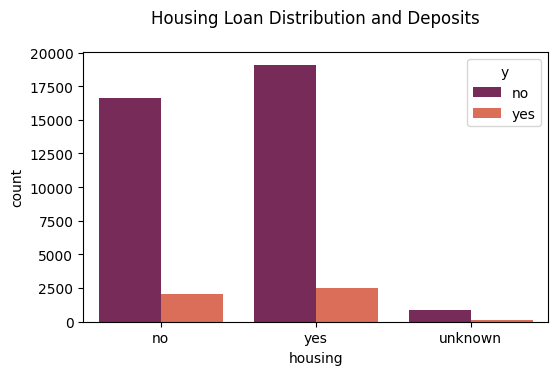

In [25]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank, hue ="y", palette="rocket")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

`Clients subscribing to Term Deposits mostly have Home loan`

### Distribution of Personal Loan

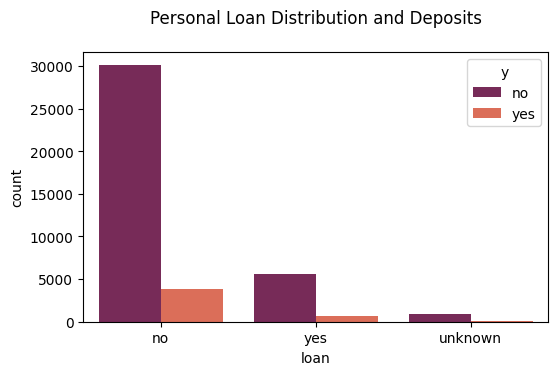

In [26]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= bank, hue ="y", palette="rocket")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

`Most of the Clients subscribing to Term Deposits don't have personal loan`

### Distribution of Outcome(Term Deposits)

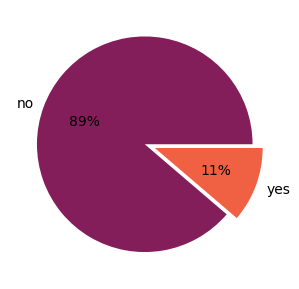

In [31]:
# Use the 'rocket' colormap
palette = sns.color_palette("rocket", len(keys))

# Plot the pie chart
plt.figure(figsize=(6, 3.5))
explode = [0, 0.1]
plt.pie(data, labels=keys, explode=explode, autopct='%.0f%%', colors=palette)
plt.show()

`11% of clients have subscribed to Term Deposit`

## Preparing data for Model Building

### Label Encoding Categorical Features

In [32]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [33]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)

In [34]:
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Correlational Analysis using Heatmap

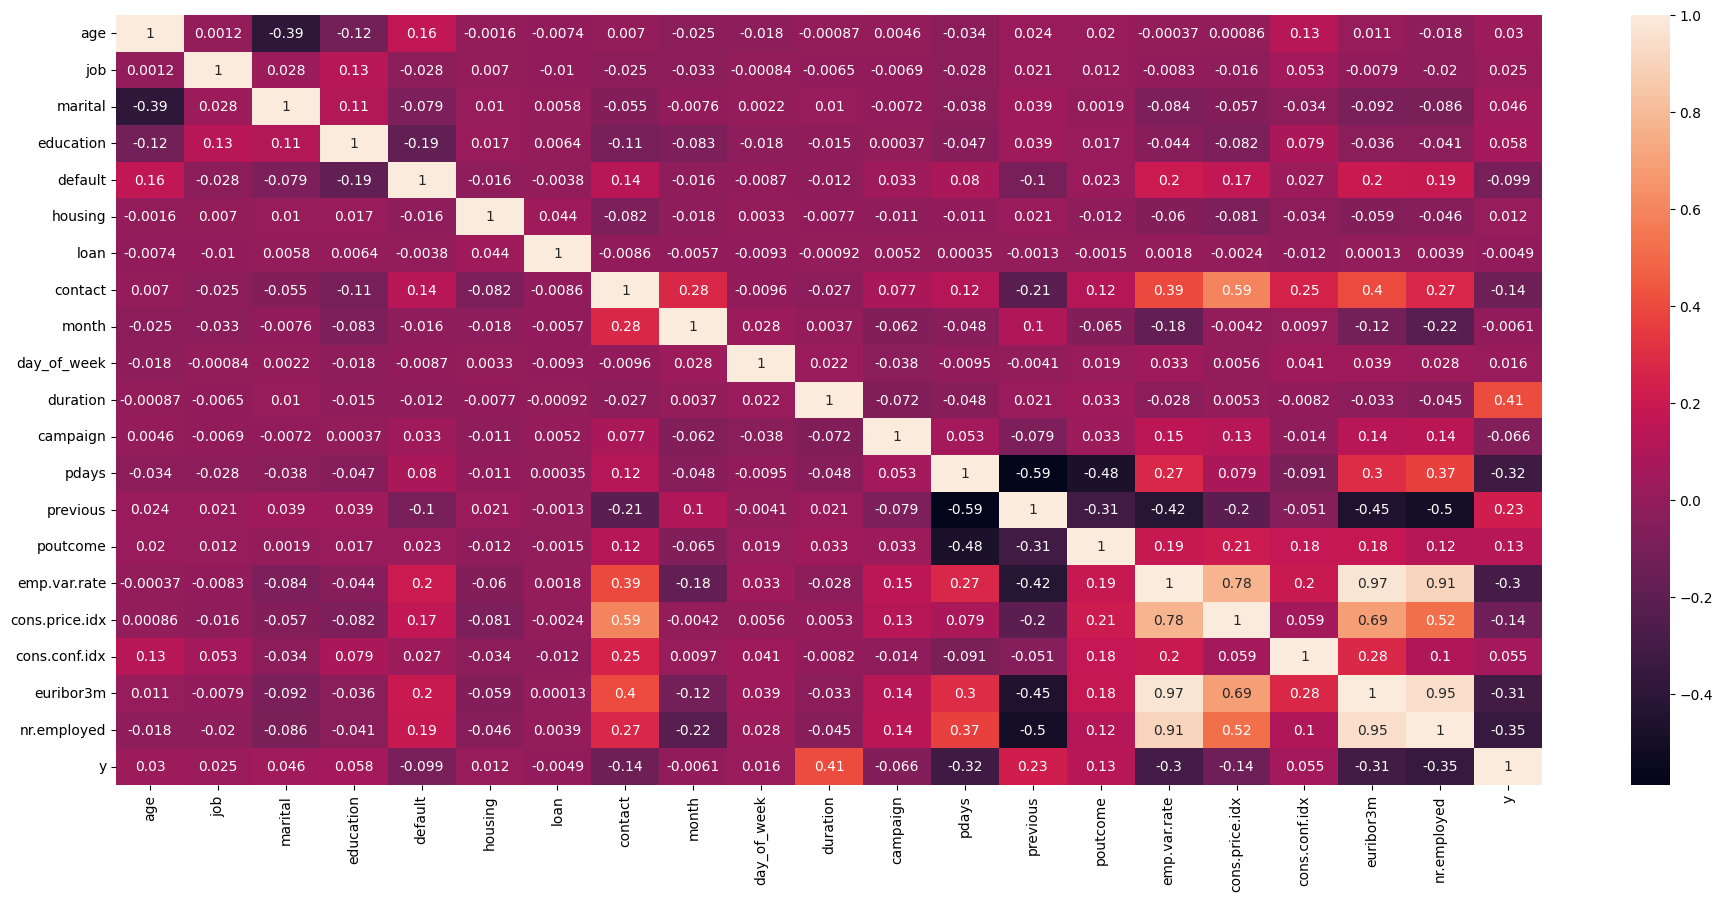

In [36]:
plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='rocket', annot=True)
plt.show()

* Outcome "y" is positively correlated with duration of call and also shows slight correlation with previous attempts of call. This implies that clients went ahead with Term deposits subscription after gaining sufficient insights from bank calls and persuation.
* Multicolinearty can be seen among some input features. This can be handled by dropping those variables or by performing LDA(Linear discriminant analysis) on the data.

### Standardization

In [37]:
# Splitting Input and Output
X = bank.drop("y", axis=1)
y = bank.y

In [38]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

## Model Tree Building- Decision Tree Classifier

In [39]:
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [40]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))    

Train Score: 1.0
Test Score: 0.8864611151574007


In [41]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

np.float64(0.8912974420406368)

In [42]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10925
           1       0.51      0.52      0.51      1432

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357



### Hyperparameter Tunning

In [43]:
#Applying Grid search cv to find best estimaters to improve model performance
param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [44]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [45]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3}

In [46]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3)

In [47]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 

np.float64(0.9142935804989467)

`We will use this best estimators to built our model.`

In [48]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [49]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9178315008150949
Test Score: 0.9143805130695153


In [50]:
pred_y = clf.predict(test_X)

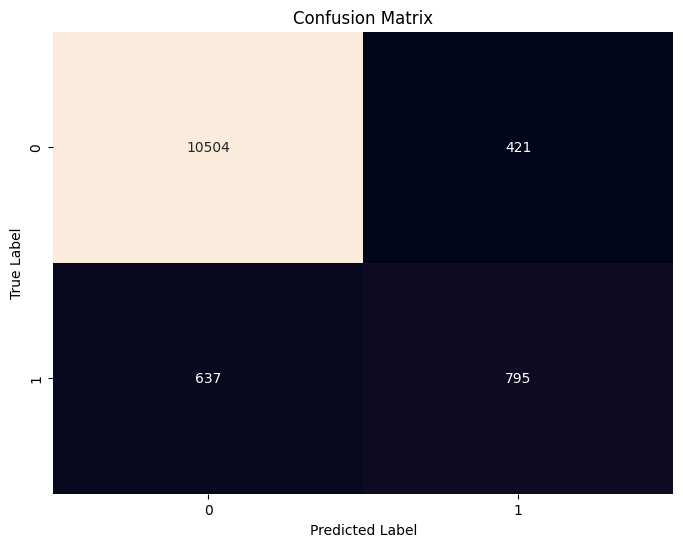

In [61]:
# Make predictions
y_pred = clf.predict(test_X)

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Plot confusion matrix using Seaborn heatmap with 'rocket' palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [62]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11141
           1       0.56      0.65      0.60      1216

    accuracy                           0.91     12357
   macro avg       0.76      0.80      0.78     12357
weighted avg       0.92      0.91      0.92     12357



In [63]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 91.43805130695154


In [64]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  91.1548395039415


## Visualizing the Tree

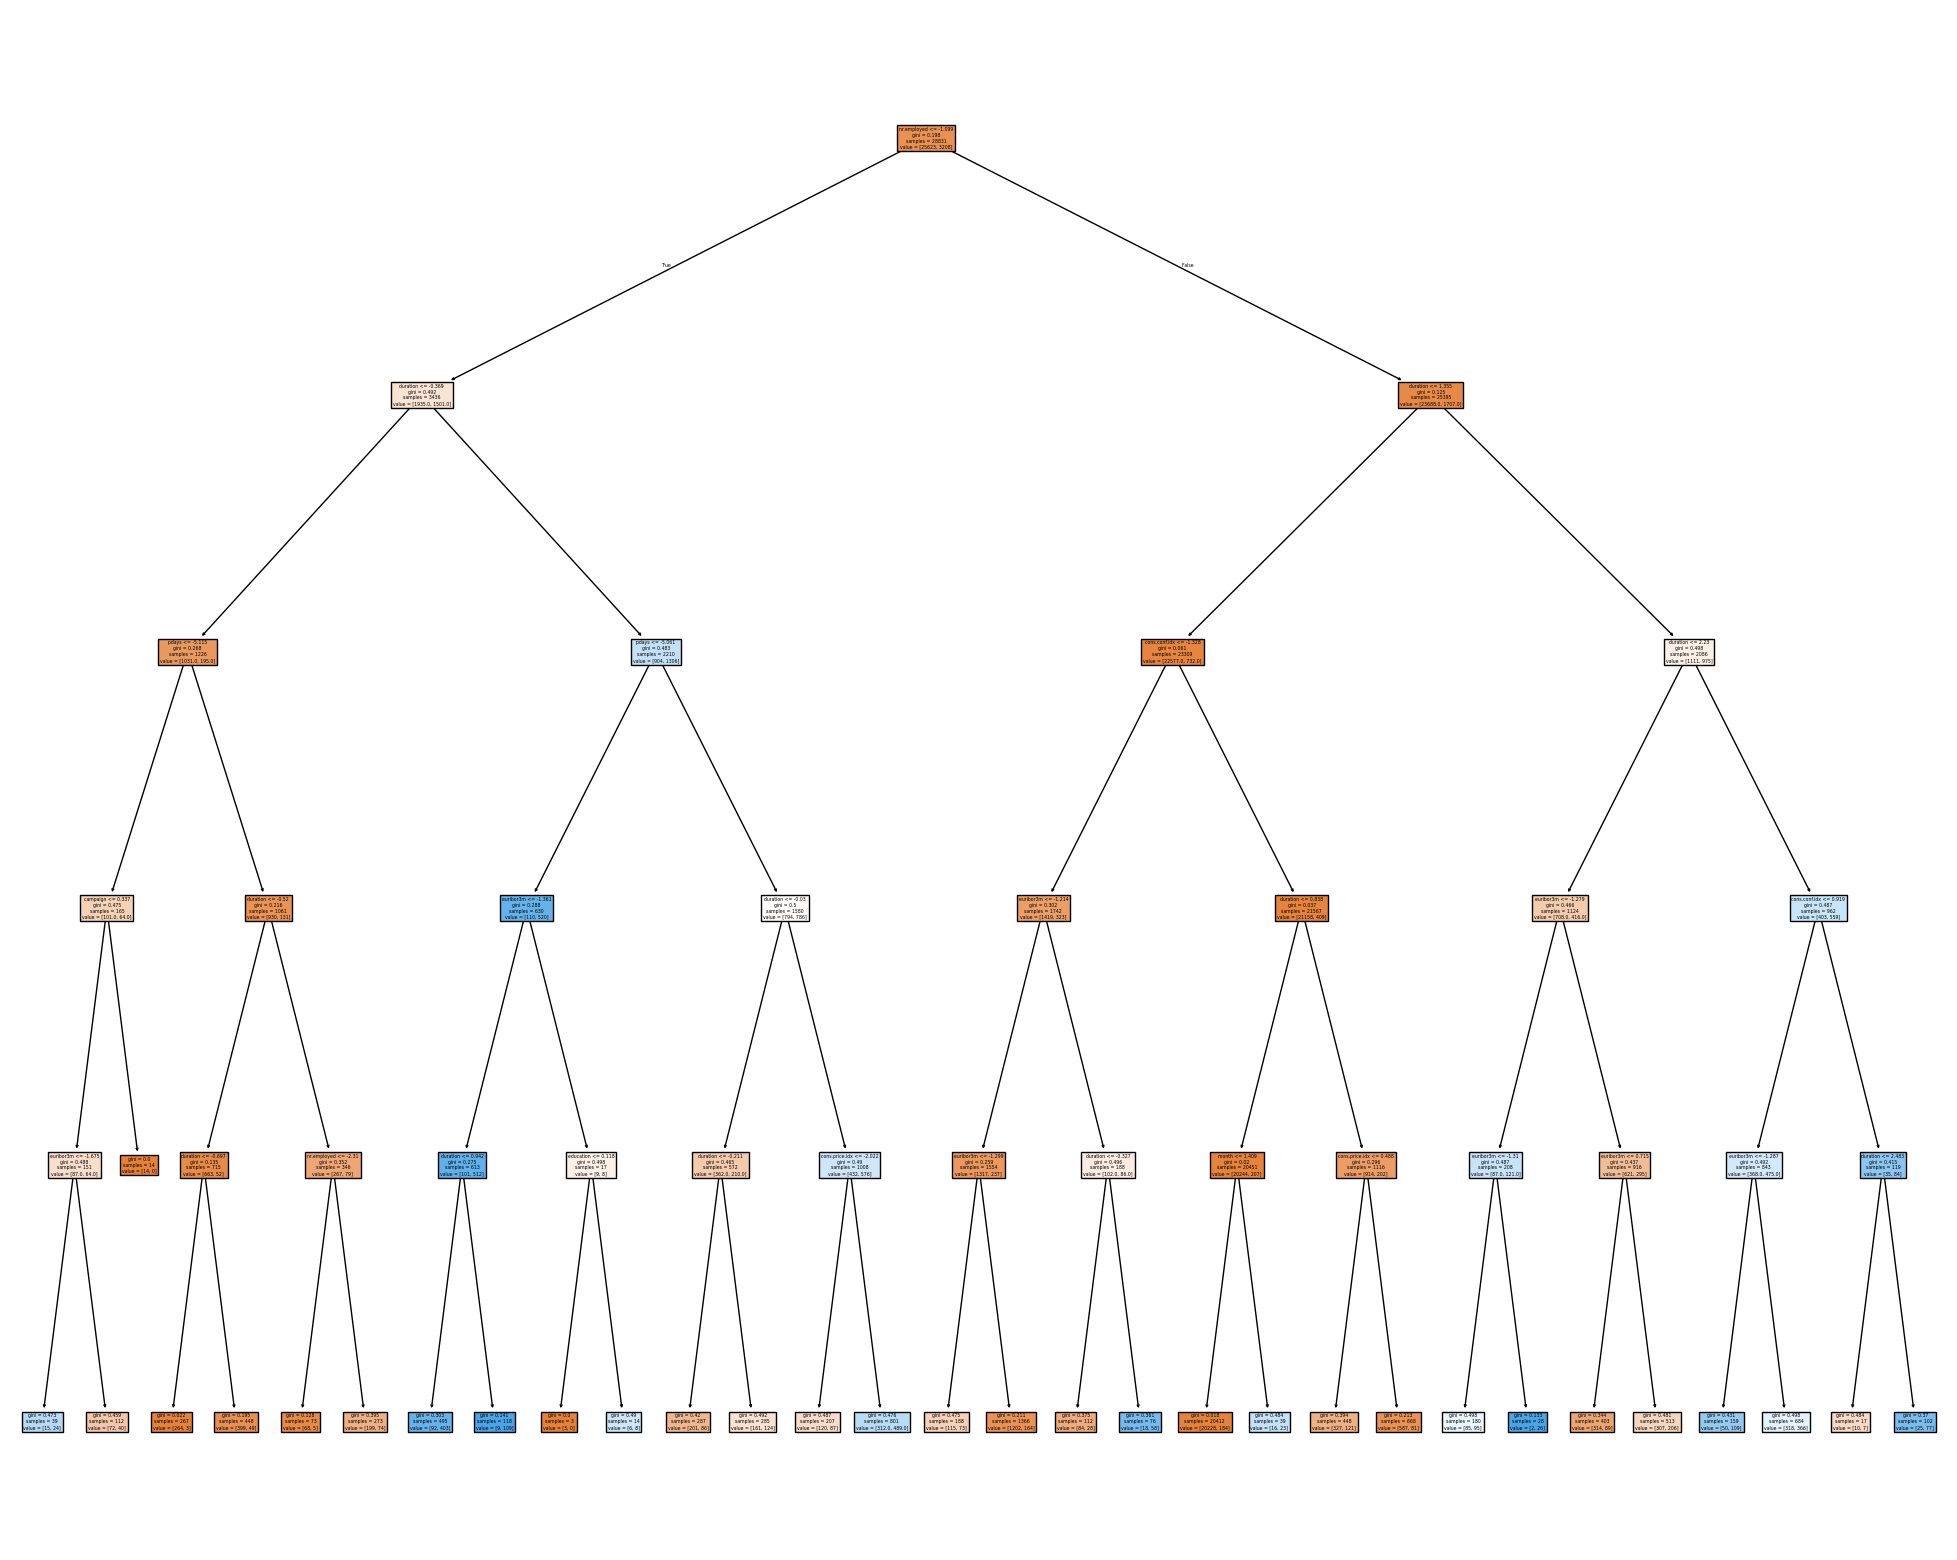

In [65]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)

### Insights
* Call Duration:
Longer conversations with clients significantly increased the likelihood of term deposit subscriptions. This highlights the importance of engaging clients effectively during calls.

* Repeated Contact:
Previous attempts to contact clients also played a crucial role. Repeated contact can be fruitful in convincing clients to subscribe.

* Multicollinearity:
Some input features exhibited multicollinearity, which might affect model performance. Future iterations should address this issue for improved accuracy.